In [1]:
using CSV
using DataFrames
using Plots
using StatsPlots
using GLM
using Statistics
using Distributions
using Random
using MultivariateStats

In [2]:
wageData = CSV.File("dataset/Wage.csv") |> DataFrame;

In [4]:
ols = lm(@formula(wage ~ age + age^2 + age^3 + age^4 ), wageData)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

wage ~ 1 + age + :(age ^ 2) + :(age ^ 3) + :(age ^ 4)

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────
                     Coef.   Std. Error      t  Pr(>|t|)       Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────────
(Intercept)  -184.154       60.0404      -3.07    0.0022  -301.879        -66.4296
age            21.2455       5.88675      3.61    0.0003     9.70304       32.788
age ^ 2        -0.563859     0.206108    -2.74    0.0063    -0.967987      -0.159731
age ^ 3         0.00681069   0.00306593   2.22    0.0264     0.000799144    0.0128222
age ^ 4        -3.20383e-5   1.64136e-5  -1.95    0.0510    -6.42214e-5     1.44743e-7
─────────────────────────────────────────────────────────────────────────────

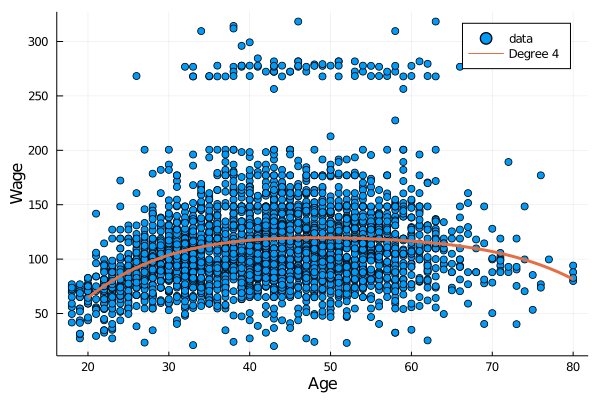

In [14]:
# Figure 7.1 (left)

x = collect(20:80)
y = predict(ols, DataFrame(age=x))
scatter(wageData.age, wageData.wage, label="data")
plot!(x, y, lw=3, xlabel="Age", ylabel="Wage", label="Degree 4")

In [16]:
wageData.is_250Wage = convert(Array{Int64, 1}, wageData.wage .> 250);

In [19]:
logit = glm(@formula(is_250Wage ~ age + age^2 + age^3 + age^4), wageData, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

is_250Wage ~ 1 + age + :(age ^ 2) + :(age ^ 3) + :(age ^ 4)

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────
                     Coef.   Std. Error      z  Pr(>|z|)       Lower 95%     Upper 95%
──────────────────────────────────────────────────────────────────────────────────────
(Intercept)  -109.553       47.6275      -2.30    0.0214  -202.901        -16.2048
age             8.995        4.18449      2.15    0.0316     0.793556      17.1964
age ^ 2        -0.281632     0.135249    -2.08    0.0373    -0.546714      -0.0165495
age ^ 3         0.00385798   0.00190698   2.02    0.0431     0.000120358    0.0075956
age ^ 4        -1.9492e-5    9.90657e-6  -1.97    0.0491    -3.89085e-5    -7.54267e-8
─────────────────────────────

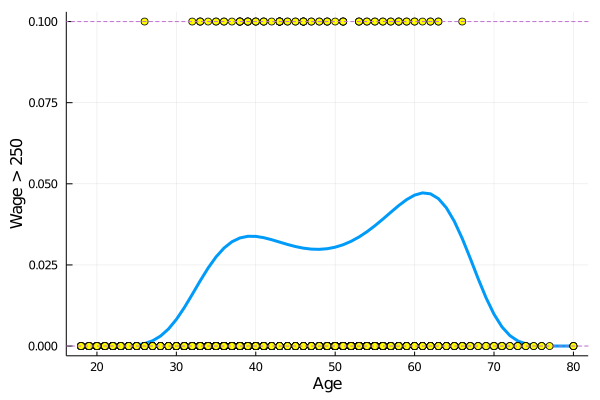

In [25]:
# Figure 7.1 (right)
prob = predict(logit, DataFrame(age=x))

w_no = wageData[(wageData.wage .< 250), :]
low = w_no.age

w_yes = wageData[(wageData.wage .> 250), :]
high = w_yes.age

plot(x, prob, lw=3, xlabel="Age", ylabel="Wage > 250")
scatter!(low, zeros(length(low)), markercolor="yellow")
scatter!(high, 0.1 .* ones(length(high)), markercolor="yellow")
hline!([0, 0.1], line=:dash, legend=false)

In [34]:
wageData.is_firstGroup = convert(Array{Int64, 1}, wageData.age .< 33.5);
wageData.is_secondGroup = convert(Array{Int64, 1}, (wageData.age .> 33.5) .& (wageData.age .< 49.0));
wageData.is_thirdGroup = convert(Array{Int64, 1}, (wageData.age .> 49.0) .& (wageData.age .< 64.5));
wageData.is_fourthGroup = convert(Array{Int64, 1}, wageData.age .> 64.5);

In [35]:
ols_step = lm(@formula(wage ~ is_firstGroup + is_secondGroup + is_thirdGroup + is_fourthGroup ), wageData)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Array{Float64,1}},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

wage ~ 1 + is_firstGroup + is_secondGroup + is_thirdGroup + is_fourthGroup

Coefficients:
────────────────────────────────────────────────────────────────────────────
                    Coef.  Std. Error      t  Pr(>|t|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)     120.12        4.43768  27.07    <1e-99   111.419   128.821
is_firstGroup   -25.9616      4.67679  -5.55    <1e-7    -35.1316  -16.7915
is_secondGroup   -2.02841     4.57549  -0.44    0.6576   -10.9998    6.943
is_thirdGroup    -2.297       4.66811  -0.49    0.6227   -11.45      6.85603
is_fourthGroup  -18.321       6.51113  -2.81    0.0049   -31.0877   -5.55424
────────────────────────────────────────────────────────────────────────────

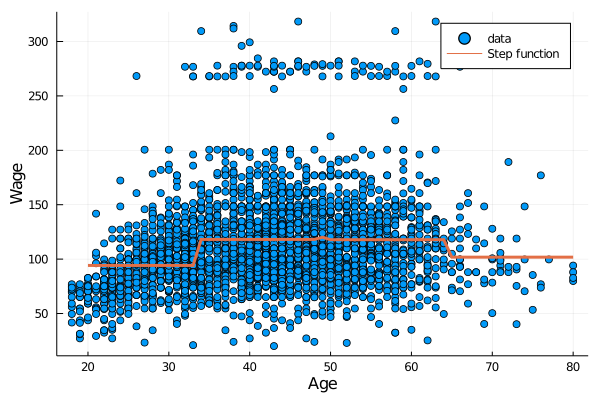

In [43]:
# Figure 7.2 (left)
x = collect(20:80)
y = []
for i in x
    fg = convert(Int64, i < 33.5);
    sg = convert(Int64, (i > 33.5) & (i < 49.0))
    tg = convert(Int64, (i > 49.0) & (i < 64.5))
    ftg = convert(Int64, i > 64.5)
    pred = predict(ols_step, DataFrame(is_firstGroup=fg, is_secondGroup=sg, is_thirdGroup=tg, is_fourthGroup=ftg))
    push!(y, pred[1])
end

scatter(wageData.age, wageData.wage, label="data")
plot!(x, y, lw=3, xlabel="Age", ylabel="Wage", label="Step function")

In [44]:
logit_step = glm(@formula(is_250Wage ~ is_firstGroup + is_secondGroup + is_thirdGroup + is_fourthGroup), wageData, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Array{Float64,1},Binomial{Float64},LogitLink},GLM.DensePredChol{Float64,LinearAlgebra.Cholesky{Float64,Array{Float64,2}}}},Array{Float64,2}}

is_250Wage ~ 1 + is_firstGroup + is_secondGroup + is_thirdGroup + is_fourthGroup

Coefficients:
─────────────────────────────────────────────────────────────────────────────
                     Coef.  Std. Error      z  Pr(>|z|)  Lower 95%  Upper 95%
─────────────────────────────────────────────────────────────────────────────
(Intercept)     -3.28341      0.588076  -5.58    <1e-7    -4.43602  -2.13081
is_firstGroup   -1.72053      0.739671  -2.33    0.0200   -3.17026  -0.270802
is_secondGroup  -0.128833     0.608628  -0.21    0.8324   -1.32172   1.06406
is_thirdGroup   -0.0057868    0.618772  -0.01    0.9925   -1.21856   1.20698
is_fourthGroup  -0.979266     1.16615   -0.84    0.4011   -3.26489   1.30636
──────────────────────────────────────────────────────────────────────────

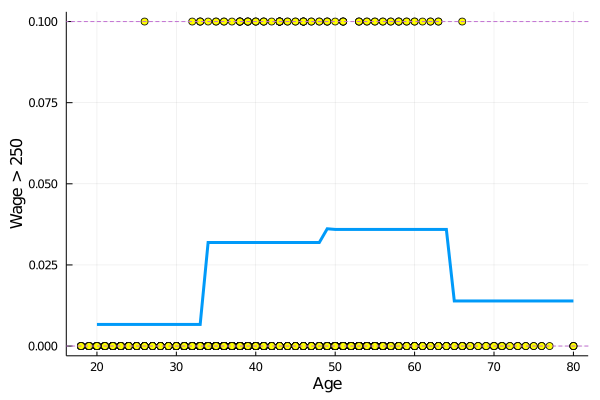

In [45]:
# Figure 7.2 (right)

x = collect(20:80)
y = []
for i in x
    fg = convert(Int64, i < 33.5);
    sg = convert(Int64, (i > 33.5) & (i < 49.0))
    tg = convert(Int64, (i > 49.0) & (i < 64.5))
    ftg = convert(Int64, i > 64.5)
    pred = predict(logit_step, DataFrame(is_firstGroup=fg, is_secondGroup=sg, is_thirdGroup=tg, is_fourthGroup=ftg))
    push!(y, pred[1])
end

w_no = wageData[(wageData.wage .< 250), :]
low = w_no.age

w_yes = wageData[(wageData.wage .> 250), :]
high = w_yes.age

plot(x, y, lw=3, xlabel="Age", ylabel="Wage > 250")
scatter!(low, zeros(length(low)), markercolor="yellow")
scatter!(high, 0.1 .* ones(length(high)), markercolor="yellow")
hline!([0, 0.1], line=:dash, legend=false)